# Logistic Regression and the Sigmoid Function

<li><b>Linear Regression</b>: Outcome = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the coefficient and x is the input variable
</li>

<li><b>Logistic Regression</b>: Approximate Probability = <b>sigmoid</b>(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub>)<br>
where, w is the coefficient and x is the input variable
</li>
<li>Output of the linear model is passed through a sigmoid/logistic function to produce the probability.</li>
<li><b>Predicted Value</b>: Probability of a binary outcome. Closer to 1 is positive class, closer to 0 is negative class</li>
<li><b>Algorithm Used</b>: Logistic Regression. Objective is to find the coefficients w that maximize separation between the two classes</li>
<li><b>Optimization</b>: Gradient Descent. Aims to minimize loss/cost so that predicted value is as close as possible to actual</li>
<li><b>Cost/Loss Calculation</b>: Logistic loss function</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Sigmoid or logistic function
# For any input x, the output is always between 0 & 1

# Binary classifier uses this function to convert the output produced by a linear model
#   into a probability between 0 & 1

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [3]:
# Sigmoid function example
x = pd.Series(np.arange(-5,5,0.5))
y = x.map(sigmoid)

In [4]:
y

0     0.006693
1     0.010987
2     0.017986
3     0.029312
4     0.047426
5     0.075858
6     0.119203
7     0.182426
8     0.268941
9     0.377541
10    0.500000
11    0.622459
12    0.731059
13    0.817574
14    0.880797
15    0.924142
16    0.952574
17    0.970688
18    0.982014
19    0.989013
dtype: float64

### Notice:
Sigmoid function produces an output between 0 and 1.  Input closer to 0 produces and output of 0.5 probability. Negative input produces value less than 0.5 while positive input produces value greater than 0.5

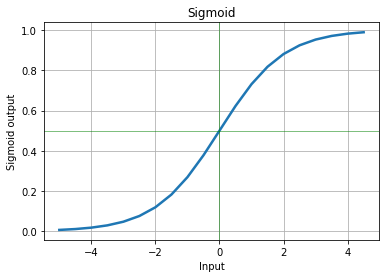

In [5]:
plt.plot(x,y, linewidth=2.5)
plt.axvline(x=0,ymin=0, linewidth=0.5, color='green')
plt.axhline(y=0.5,xmin=0, linewidth=0.5, color='green')

plt.xlabel('Input')
plt.ylabel('Sigmoid output')
plt.grid(True)
plt.title('Sigmoid')
plt.show()

## Simple Example

In [6]:
## Dataset from https://en.wikipedia.org/wiki/Logistic_regression#Examples
study_hours = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
pass_exam = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

data = pd.DataFrame({'study_hours':study_hours, 'pass_exam':pass_exam})

In [11]:
data.head()

,study_hours,pass_exam
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [8]:
# Assume this is the best straight line that can describe the data
def linear_model(x):
    return 1.5*x - 4

In [9]:
# Generate probability by running the input through the linear model and then through sigmoid function
y_linear = linear_model(data['study_hours'])

y_logistic = sigmoid(y_linear)


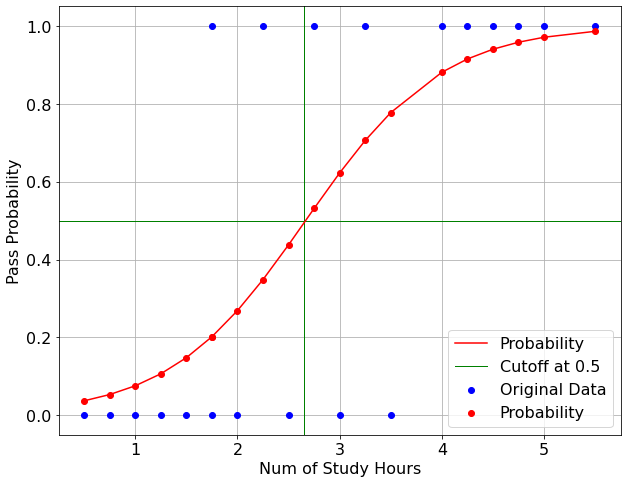

In [10]:
plt.rcParams.update({'font.size': 16})
plt.figure(1, figsize=(9, 7))
plt.clf()
plt.scatter(data['study_hours'], data['pass_exam'], color='blue', label = 'Original Data', zorder=20)

plt.scatter(data['study_hours'], y_logistic, color='red', label = 'Probability', zorder=20)
# or you can plot it as a line
plt.plot(data['study_hours'], y_logistic, color='red', label = 'Probability', zorder=20)

#plt.plot(data.study_hours, y_linear, linewidth=2, color='green', label = 'Linear', zorder=20)

plt.axvline(x=2.65,ymin=0,ymax=1,linewidth=1, color='green')

plt.axhline(y=0.5,xmin=0,xmax=6, label='Cutoff at 0.5', linewidth=1, color='green')

plt.ylabel('Pass Probability')
plt.xlabel('Num of Study Hours')

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### Interpretation
At X value of ~2.65, the curve hits 0.5 probability. That means for a student to have a higher probability of passing the exam they would need to spend 2.65 hours or more of studying.

In the above example,<br>
1. True positive is in the top right quadrant. 
2. True negative is in the bottom left quadrant. 
3. False negative is in the top left quadrant. 
4. False positive is in the bottom right quadrant. 

The threshold can be adjusted; instead of 0.5, it could be established at a different value depending on the nature of problem (more on this in the Imbalanced Classification Topic)